In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: FMS
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


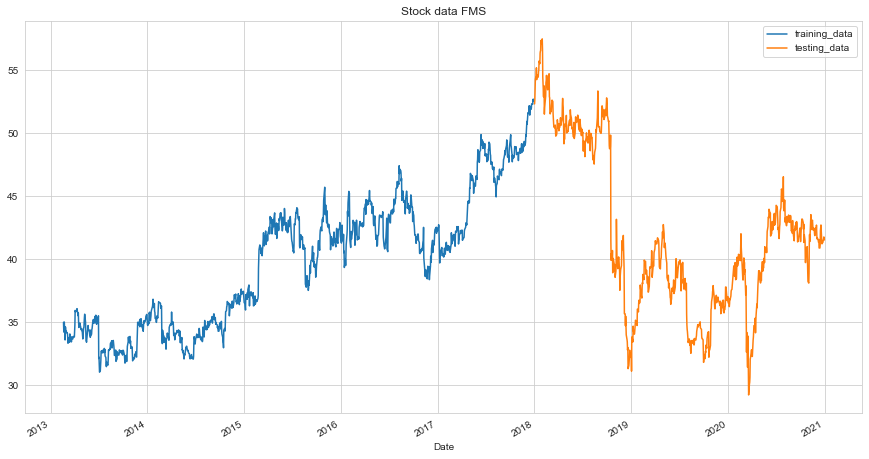

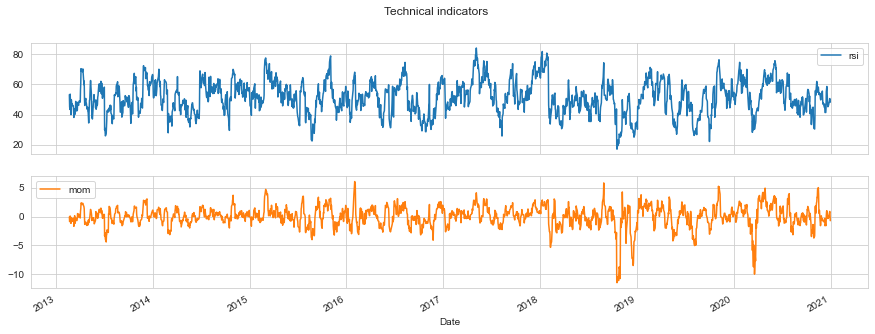

In [2]:
stock_name = 'fms'.upper()
industry = 'Healthcare'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1209.86, duration: 0:00:00.280066
episode: 2/2000, episode end value: 1191.58, duration: 0:00:00.276065
episode: 3/2000, episode end value: 1212.65, duration: 0:00:00.292062
episode: 4/2000, episode end value: 1199.18, duration: 0:00:00.314074
episode: 5/2000, episode end value: 1204.36, duration: 0:00:00.262059
episode: 6/2000, episode end value: 1196.09, duration: 0:00:00.258057
episode: 7/2000, episode end value: 1205.14, duration: 0:00:00.248057
episode: 8/2000, episode end value: 1192.05, duration: 0:00:00.239071
episode: 9/2000, episode end value: 1195.18, duration: 0:00:00.235050
episode: 10/2000, episode end value: 1191.56, duration: 0:00:00.231049
episode: 11/2000, episode end value: 1209.81, duration: 0:00:00.225050
episode: 12/2000, episode end value: 1192.75, duration: 0:00:00.253057
episode: 13/2000, episode end value: 1195.10, duration: 0:00:00.227050
episode: 14/2000, episode end value: 1190.76, duration: 0:00:00.233057
episode: 15/200

episode: 117/2000, episode end value: 1228.05, duration: 0:00:00.325071
episode: 118/2000, episode end value: 1206.39, duration: 0:00:00.317073
episode: 119/2000, episode end value: 1208.95, duration: 0:00:00.306074
episode: 120/2000, episode end value: 1233.60, duration: 0:00:00.307067
episode: 121/2000, episode end value: 1217.96, duration: 0:00:00.319070
episode: 122/2000, episode end value: 1224.34, duration: 0:00:00.297073
episode: 123/2000, episode end value: 1217.72, duration: 0:00:00.317067
episode: 124/2000, episode end value: 1231.98, duration: 0:00:00.330076
episode: 125/2000, episode end value: 1209.99, duration: 0:00:00.313069
episode: 126/2000, episode end value: 1236.18, duration: 0:00:00.329080
episode: 127/2000, episode end value: 1225.40, duration: 0:00:00.342080
episode: 128/2000, episode end value: 1232.95, duration: 0:00:00.326070
episode: 129/2000, episode end value: 1205.86, duration: 0:00:00.351083
episode: 130/2000, episode end value: 1215.62, duration: 0:00:00

episode: 231/2000, episode end value: 1229.17, duration: 0:00:00.423096
episode: 232/2000, episode end value: 1208.17, duration: 0:00:00.467107
episode: 233/2000, episode end value: 1215.14, duration: 0:00:00.466105
episode: 234/2000, episode end value: 1232.15, duration: 0:00:00.464105
episode: 235/2000, episode end value: 1210.40, duration: 0:00:00.450101
episode: 236/2000, episode end value: 1207.75, duration: 0:00:00.518117
episode: 237/2000, episode end value: 1215.29, duration: 0:00:00.473108
episode: 238/2000, episode end value: 1232.17, duration: 0:00:00.509114
episode: 239/2000, episode end value: 1220.04, duration: 0:00:00.519117
episode: 240/2000, episode end value: 1224.19, duration: 0:00:00.543124
episode: 241/2000, episode end value: 1206.49, duration: 0:00:00.558129
episode: 242/2000, episode end value: 1229.35, duration: 0:00:00.559981
episode: 243/2000, episode end value: 1219.59, duration: 0:00:00.540814
episode: 244/2000, episode end value: 1225.83, duration: 0:00:00

episode: 345/2000, episode end value: 1210.54, duration: 0:00:00.479109
episode: 346/2000, episode end value: 1225.25, duration: 0:00:00.511064
episode: 347/2000, episode end value: 1232.23, duration: 0:00:00.468104
episode: 348/2000, episode end value: 1233.76, duration: 0:00:00.424099
episode: 349/2000, episode end value: 1227.42, duration: 0:00:00.460104
episode: 350/2000, episode end value: 1231.08, duration: 0:00:00.444106
episode: 351/2000, episode end value: 1208.74, duration: 0:00:00.514113
episode: 352/2000, episode end value: 1204.42, duration: 0:00:00.447101
episode: 353/2000, episode end value: 1212.19, duration: 0:00:00.437099
episode: 354/2000, episode end value: 1222.26, duration: 0:00:00.418095
episode: 355/2000, episode end value: 1221.93, duration: 0:00:00.461104
episode: 356/2000, episode end value: 1219.34, duration: 0:00:00.475107
episode: 357/2000, episode end value: 1209.56, duration: 0:00:00.407092
episode: 358/2000, episode end value: 1216.67, duration: 0:00:00

episode: 459/2000, episode end value: 1223.18, duration: 0:00:00.485110
episode: 460/2000, episode end value: 1219.47, duration: 0:00:00.504118
episode: 461/2000, episode end value: 1214.05, duration: 0:00:00.423098
episode: 462/2000, episode end value: 1224.87, duration: 0:00:00.421095
episode: 463/2000, episode end value: 1227.02, duration: 0:00:00.409096
episode: 464/2000, episode end value: 1220.85, duration: 0:00:00.427095
episode: 465/2000, episode end value: 1221.36, duration: 0:00:00.405091
episode: 466/2000, episode end value: 1211.22, duration: 0:00:00.475107
episode: 467/2000, episode end value: 1224.48, duration: 0:00:00.509115
episode: 468/2000, episode end value: 1230.53, duration: 0:00:00.472108
episode: 469/2000, episode end value: 1203.44, duration: 0:00:00.429096
episode: 470/2000, episode end value: 1214.59, duration: 0:00:00.384088
episode: 471/2000, episode end value: 1232.67, duration: 0:00:00.459103
episode: 472/2000, episode end value: 1219.61, duration: 0:00:00

episode: 573/2000, episode end value: 1226.81, duration: 0:00:00.454101
episode: 574/2000, episode end value: 1213.00, duration: 0:00:00.410095
episode: 575/2000, episode end value: 1223.00, duration: 0:00:00.531118
episode: 576/2000, episode end value: 1217.82, duration: 0:00:00.480109
episode: 577/2000, episode end value: 1220.69, duration: 0:00:00.448099
episode: 578/2000, episode end value: 1194.74, duration: 0:00:00.401093
episode: 579/2000, episode end value: 1212.63, duration: 0:00:00.424096
episode: 580/2000, episode end value: 1227.55, duration: 0:00:00.433097
episode: 581/2000, episode end value: 1204.40, duration: 0:00:00.391092
episode: 582/2000, episode end value: 1221.12, duration: 0:00:00.483108
episode: 583/2000, episode end value: 1212.01, duration: 0:00:00.403091
episode: 584/2000, episode end value: 1214.80, duration: 0:00:00.433099
episode: 585/2000, episode end value: 1230.58, duration: 0:00:00.482108
episode: 586/2000, episode end value: 1217.65, duration: 0:00:00

episode: 687/2000, episode end value: 1235.87, duration: 0:00:00.467107
episode: 688/2000, episode end value: 1206.75, duration: 0:00:00.454107
episode: 689/2000, episode end value: 1199.13, duration: 0:00:00.376083
episode: 690/2000, episode end value: 1216.42, duration: 0:00:00.489107
episode: 691/2000, episode end value: 1225.95, duration: 0:00:00.417091
episode: 692/2000, episode end value: 1232.26, duration: 0:00:00.446101
episode: 693/2000, episode end value: 1207.74, duration: 0:00:00.445101
episode: 694/2000, episode end value: 1214.98, duration: 0:00:00.452101
episode: 695/2000, episode end value: 1228.91, duration: 0:00:00.469104
episode: 696/2000, episode end value: 1219.42, duration: 0:00:00.487114
episode: 697/2000, episode end value: 1221.87, duration: 0:00:00.391089
episode: 698/2000, episode end value: 1220.90, duration: 0:00:00.405084
episode: 699/2000, episode end value: 1224.16, duration: 0:00:00.412092
episode: 700/2000, episode end value: 1224.54, duration: 0:00:00

episode: 801/2000, episode end value: 1224.68, duration: 0:00:00.521111
episode: 802/2000, episode end value: 1219.70, duration: 0:00:00.412093
episode: 803/2000, episode end value: 1214.82, duration: 0:00:00.494114
episode: 804/2000, episode end value: 1226.94, duration: 0:00:00.453106
episode: 805/2000, episode end value: 1227.62, duration: 0:00:00.410096
episode: 806/2000, episode end value: 1192.90, duration: 0:00:00.385084
episode: 807/2000, episode end value: 1210.77, duration: 0:00:00.462107
episode: 808/2000, episode end value: 1218.62, duration: 0:00:00.431096
episode: 809/2000, episode end value: 1219.84, duration: 0:00:00.456104
episode: 810/2000, episode end value: 1234.66, duration: 0:00:00.427096
episode: 811/2000, episode end value: 1213.21, duration: 0:00:00.452102
episode: 812/2000, episode end value: 1232.59, duration: 0:00:00.434098
episode: 813/2000, episode end value: 1244.82, duration: 0:00:00.376085
episode: 814/2000, episode end value: 1191.05, duration: 0:00:00

episode: 915/2000, episode end value: 1230.42, duration: 0:00:00.469105
episode: 916/2000, episode end value: 1216.40, duration: 0:00:00.490110
episode: 917/2000, episode end value: 1214.21, duration: 0:00:00.384090
episode: 918/2000, episode end value: 1208.38, duration: 0:00:00.415093
episode: 919/2000, episode end value: 1215.17, duration: 0:00:00.441099
episode: 920/2000, episode end value: 1223.95, duration: 0:00:00.377083
episode: 921/2000, episode end value: 1227.28, duration: 0:00:00.445100
episode: 922/2000, episode end value: 1221.81, duration: 0:00:00.510115
episode: 923/2000, episode end value: 1219.97, duration: 0:00:00.486113
episode: 924/2000, episode end value: 1220.41, duration: 0:00:00.468106
episode: 925/2000, episode end value: 1220.64, duration: 0:00:00.483109
episode: 926/2000, episode end value: 1210.08, duration: 0:00:00.440101
episode: 927/2000, episode end value: 1206.14, duration: 0:00:00.473105
episode: 928/2000, episode end value: 1206.34, duration: 0:00:00

episode: 1029/2000, episode end value: 1182.26, duration: 0:00:00.410091
episode: 1030/2000, episode end value: 1193.30, duration: 0:00:00.421094
episode: 1031/2000, episode end value: 1225.24, duration: 0:00:00.477108
episode: 1032/2000, episode end value: 1212.34, duration: 0:00:00.456106
episode: 1033/2000, episode end value: 1209.48, duration: 0:00:00.424095
episode: 1034/2000, episode end value: 1231.43, duration: 0:00:00.464103
episode: 1035/2000, episode end value: 1222.58, duration: 0:00:00.478634
episode: 1036/2000, episode end value: 1207.64, duration: 0:00:00.423053
episode: 1037/2000, episode end value: 1230.41, duration: 0:00:00.526120
episode: 1038/2000, episode end value: 1211.93, duration: 0:00:00.473107
episode: 1039/2000, episode end value: 1232.56, duration: 0:00:00.488116
episode: 1040/2000, episode end value: 1224.00, duration: 0:00:00.531618
episode: 1041/2000, episode end value: 1233.46, duration: 0:00:00.511271
episode: 1042/2000, episode end value: 1205.57, dur

episode: 1142/2000, episode end value: 1212.68, duration: 0:00:00.396092
episode: 1143/2000, episode end value: 1214.89, duration: 0:00:00.366083
episode: 1144/2000, episode end value: 1224.43, duration: 0:00:00.418094
episode: 1145/2000, episode end value: 1226.70, duration: 0:00:00.485109
episode: 1146/2000, episode end value: 1229.23, duration: 0:00:00.440099
episode: 1147/2000, episode end value: 1227.86, duration: 0:00:00.469106
episode: 1148/2000, episode end value: 1227.72, duration: 0:00:00.413098
episode: 1149/2000, episode end value: 1217.60, duration: 0:00:00.445095
episode: 1150/2000, episode end value: 1229.01, duration: 0:00:00.459103
episode: 1151/2000, episode end value: 1211.34, duration: 0:00:00.450101
episode: 1152/2000, episode end value: 1235.24, duration: 0:00:00.514714
episode: 1153/2000, episode end value: 1198.17, duration: 0:00:00.482108
episode: 1154/2000, episode end value: 1207.79, duration: 0:00:00.490109
episode: 1155/2000, episode end value: 1211.98, dur

episode: 1255/2000, episode end value: 1235.51, duration: 0:00:00.428096
episode: 1256/2000, episode end value: 1173.25, duration: 0:00:00.352314
episode: 1257/2000, episode end value: 1209.97, duration: 0:00:00.429794
episode: 1258/2000, episode end value: 1221.92, duration: 0:00:00.458100
episode: 1259/2000, episode end value: 1206.69, duration: 0:00:00.309072
episode: 1260/2000, episode end value: 1219.73, duration: 0:00:00.384085
episode: 1261/2000, episode end value: 1225.89, duration: 0:00:00.388087
episode: 1262/2000, episode end value: 1206.17, duration: 0:00:00.447101
episode: 1263/2000, episode end value: 1219.77, duration: 0:00:00.469106
episode: 1264/2000, episode end value: 1212.12, duration: 0:00:00.423096
episode: 1265/2000, episode end value: 1186.31, duration: 0:00:00.417094
episode: 1266/2000, episode end value: 1226.66, duration: 0:00:00.420097
episode: 1267/2000, episode end value: 1194.88, duration: 0:00:00.455106
episode: 1268/2000, episode end value: 1204.09, dur

episode: 1368/2000, episode end value: 1209.21, duration: 0:00:00.382085
episode: 1369/2000, episode end value: 1197.71, duration: 0:00:00.427097
episode: 1370/2000, episode end value: 1193.05, duration: 0:00:00.395089
episode: 1371/2000, episode end value: 1212.08, duration: 0:00:00.414094
episode: 1372/2000, episode end value: 1247.97, duration: 0:00:00.471111
episode: 1373/2000, episode end value: 1198.68, duration: 0:00:00.457104
episode: 1374/2000, episode end value: 1208.30, duration: 0:00:00.392086
episode: 1375/2000, episode end value: 1197.66, duration: 0:00:00.416094
episode: 1376/2000, episode end value: 1197.52, duration: 0:00:00.399089
episode: 1377/2000, episode end value: 1191.98, duration: 0:00:00.447107
episode: 1378/2000, episode end value: 1216.49, duration: 0:00:00.456102
episode: 1379/2000, episode end value: 1230.98, duration: 0:00:00.402093
episode: 1380/2000, episode end value: 1216.56, duration: 0:00:00.384087
episode: 1381/2000, episode end value: 1188.43, dur

episode: 1481/2000, episode end value: 1199.43, duration: 0:00:00.436097
episode: 1482/2000, episode end value: 1211.60, duration: 0:00:00.452849
episode: 1483/2000, episode end value: 1201.72, duration: 0:00:00.396463
episode: 1484/2000, episode end value: 1212.31, duration: 0:00:00.450101
episode: 1485/2000, episode end value: 1201.98, duration: 0:00:00.473101
episode: 1486/2000, episode end value: 1201.62, duration: 0:00:00.415099
episode: 1487/2000, episode end value: 1201.59, duration: 0:00:00.434091
episode: 1488/2000, episode end value: 1208.53, duration: 0:00:00.444098
episode: 1489/2000, episode end value: 1215.32, duration: 0:00:00.488112
episode: 1490/2000, episode end value: 1199.69, duration: 0:00:00.437097
episode: 1491/2000, episode end value: 1222.71, duration: 0:00:00.457104
episode: 1492/2000, episode end value: 1229.46, duration: 0:00:00.494108
episode: 1493/2000, episode end value: 1232.90, duration: 0:00:00.401090
episode: 1494/2000, episode end value: 1204.46, dur

episode: 1594/2000, episode end value: 1231.76, duration: 0:00:00.346742
episode: 1595/2000, episode end value: 1210.74, duration: 0:00:00.380802
episode: 1596/2000, episode end value: 1210.07, duration: 0:00:00.351081
episode: 1597/2000, episode end value: 1210.55, duration: 0:00:00.328072
episode: 1598/2000, episode end value: 1219.00, duration: 0:00:00.299065
episode: 1599/2000, episode end value: 1231.76, duration: 0:00:00.281070
episode: 1600/2000, episode end value: 1177.37, duration: 0:00:00.307068
episode: 1601/2000, episode end value: 1193.30, duration: 0:00:00.339070
episode: 1602/2000, episode end value: 1187.03, duration: 0:00:00.335581
episode: 1603/2000, episode end value: 1204.36, duration: 0:00:00.365504
episode: 1604/2000, episode end value: 1203.59, duration: 0:00:00.390845
episode: 1605/2000, episode end value: 1220.54, duration: 0:00:00.369083
episode: 1606/2000, episode end value: 1225.07, duration: 0:00:00.385087
episode: 1607/2000, episode end value: 1202.25, dur

episode: 1707/2000, episode end value: 1232.34, duration: 0:00:00.438096
episode: 1708/2000, episode end value: 1285.56, duration: 0:00:00.328074
episode: 1709/2000, episode end value: 1194.03, duration: 0:00:00.333076
episode: 1710/2000, episode end value: 1210.57, duration: 0:00:00.434101
episode: 1711/2000, episode end value: 1211.55, duration: 0:00:00.362081
episode: 1712/2000, episode end value: 1220.51, duration: 0:00:00.409099
episode: 1713/2000, episode end value: 1211.56, duration: 0:00:00.392086
episode: 1714/2000, episode end value: 1211.30, duration: 0:00:00.365082
episode: 1715/2000, episode end value: 1215.05, duration: 0:00:00.417099
episode: 1716/2000, episode end value: 1206.33, duration: 0:00:00.395088
episode: 1717/2000, episode end value: 1210.38, duration: 0:00:00.427097
episode: 1718/2000, episode end value: 1228.28, duration: 0:00:00.392088
episode: 1719/2000, episode end value: 1253.15, duration: 0:00:00.375084
episode: 1720/2000, episode end value: 1192.81, dur

episode: 1820/2000, episode end value: 1213.97, duration: 0:00:00.295066
episode: 1821/2000, episode end value: 1222.90, duration: 0:00:00.331079
episode: 1822/2000, episode end value: 1228.86, duration: 0:00:00.332072
episode: 1823/2000, episode end value: 1198.18, duration: 0:00:00.381090
episode: 1824/2000, episode end value: 1191.41, duration: 0:00:00.370090
episode: 1825/2000, episode end value: 1189.45, duration: 0:00:00.339073
episode: 1826/2000, episode end value: 1199.91, duration: 0:00:00.355080
episode: 1827/2000, episode end value: 1205.80, duration: 0:00:00.402091
episode: 1828/2000, episode end value: 1228.56, duration: 0:00:00.302070
episode: 1829/2000, episode end value: 1204.07, duration: 0:00:00.338074
episode: 1830/2000, episode end value: 1243.03, duration: 0:00:00.373086
episode: 1831/2000, episode end value: 1210.32, duration: 0:00:00.316068
episode: 1832/2000, episode end value: 1220.94, duration: 0:00:00.335074
episode: 1833/2000, episode end value: 1224.41, dur

episode: 1933/2000, episode end value: 1225.26, duration: 0:00:00.370086
episode: 1934/2000, episode end value: 1228.90, duration: 0:00:00.384088
episode: 1935/2000, episode end value: 1234.22, duration: 0:00:00.352081
episode: 1936/2000, episode end value: 1222.45, duration: 0:00:00.339076
episode: 1937/2000, episode end value: 1233.06, duration: 0:00:00.370086
episode: 1938/2000, episode end value: 1227.91, duration: 0:00:00.346038
episode: 1939/2000, episode end value: 1230.83, duration: 0:00:00.348087
episode: 1940/2000, episode end value: 1229.91, duration: 0:00:00.344089
episode: 1941/2000, episode end value: 1229.21, duration: 0:00:00.373077
episode: 1942/2000, episode end value: 1231.35, duration: 0:00:00.395086
episode: 1943/2000, episode end value: 1231.83, duration: 0:00:00.379092
episode: 1944/2000, episode end value: 1233.00, duration: 0:00:00.366083
episode: 1945/2000, episode end value: 1236.01, duration: 0:00:00.350076
episode: 1946/2000, episode end value: 1224.95, dur

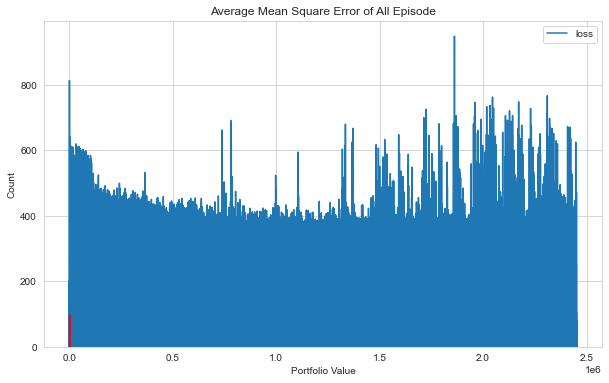

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

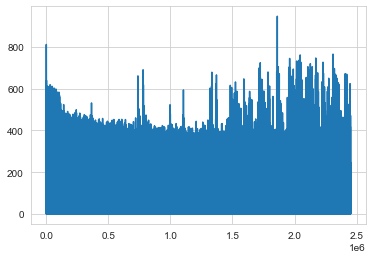

In [5]:
plt.plot(agent.model.losses)

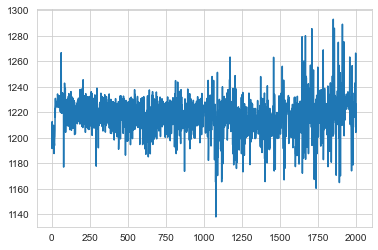

In [6]:
plt.plot(portfolio_value)

episode end value: 1058.05, duration: 0:00:00.127024
Sell: 342 times, Buy: 291 times


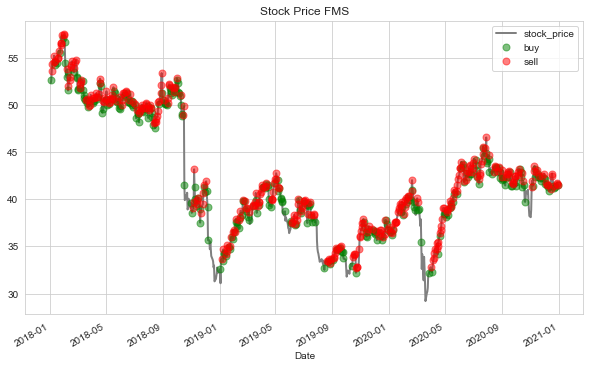

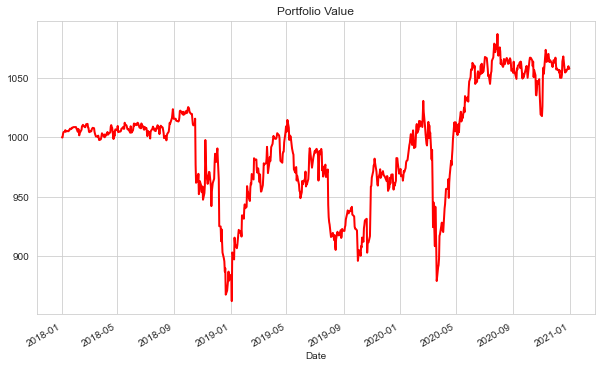

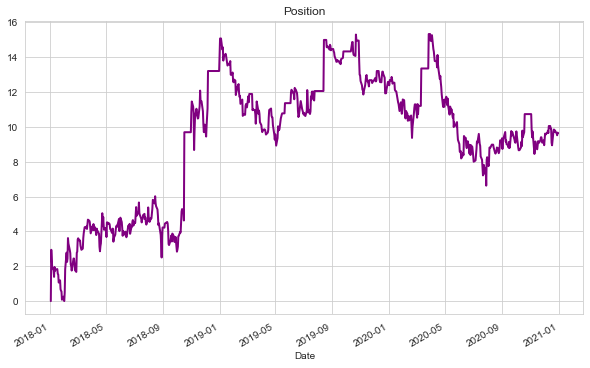

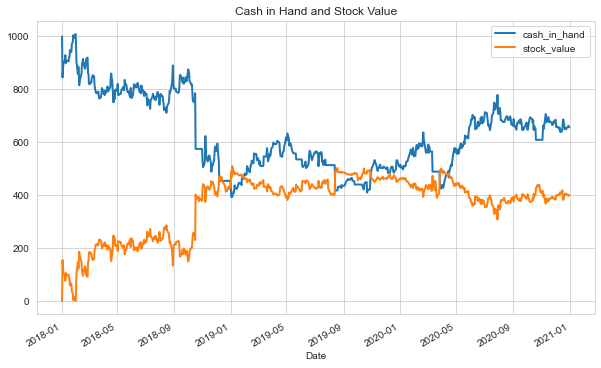

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: FMS
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 1.90 %
Volatility: 0.1222
shape ratio: 0.0654
Maximun drawdown: -15.94 %
Calmar ratio: 0.1191
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -7.40 %
Volatility (benchmark): 0.2996
shape ratio: -0.2837
Maximun drawdown: -49.21 %
Calmar ratio (benchmark): -0.1504


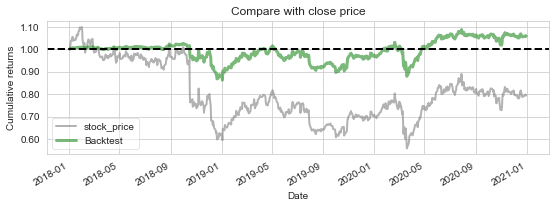

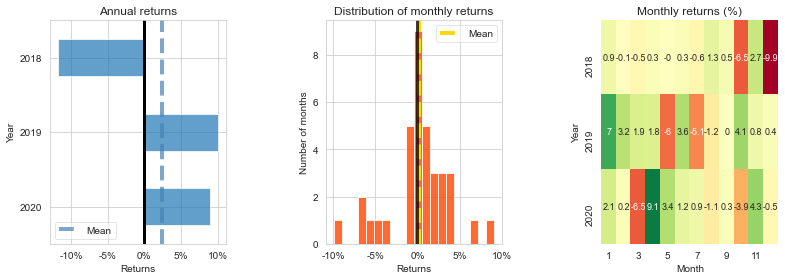

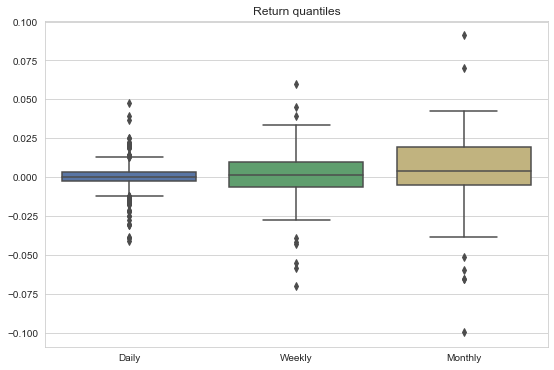

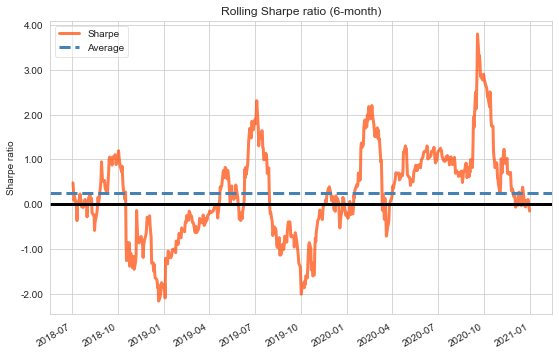

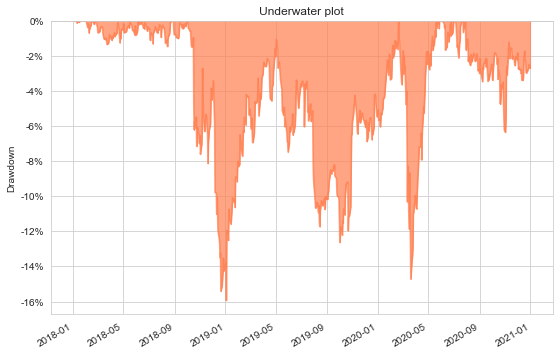

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')